In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('beer-servings.csv', index_col=False)
print(data)

     Unnamed: 0      country  beer_servings  spirit_servings  wine_servings  \
0             0  Afghanistan            0.0              0.0            0.0   
1             1      Albania           89.0            132.0           54.0   
2             2      Algeria           25.0              0.0           14.0   
3             3      Andorra          245.0            138.0          312.0   
4             4       Angola          217.0             57.0           45.0   
..          ...          ...            ...              ...            ...   
188         188    Venezuela            NaN            100.0            3.0   
189         189      Vietnam          111.0              2.0            1.0   
190         190        Yemen            6.0              0.0            0.0   
191         191       Zambia           32.0             19.0            4.0   
192         192     Zimbabwe           64.0             18.0            4.0   

     total_litres_of_pure_alcohol      continent  


In [ ]:
data.shape

(193, 7)

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


**Dropping Duplicate Rows if any**

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(0)

- code snippet to select duplicate rows
- data = data[~duplicated_rows]
- or
- data.drop_duplicates(inplace=True)
- data = data.drop_duplicates()

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(193, 7)

In [ ]:
data.isna()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
188,False,False,True,False,False,False,False
189,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


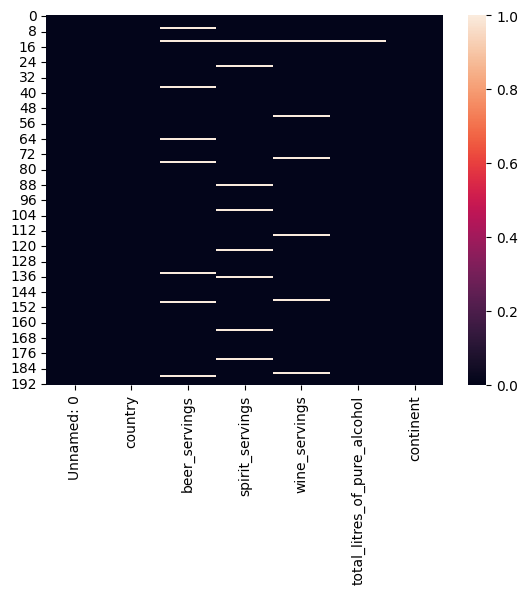

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
# data = data.dropna()
# Default inplace = False
# data.dropna[inplace=True]


In [ ]:
# Define in which columns to look for NA values
#data.dropna(subset=["beer_servings", "wine_servings"])
#data.dropna(subset=["beer_servings", "wine_servings"], inplace = True)
#data


**Handling missing values**
- Splitting Numerical and categorical columns

In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
Categorical columns are
['country', 'continent']


**Check histograms of numerical columns for data imputation**

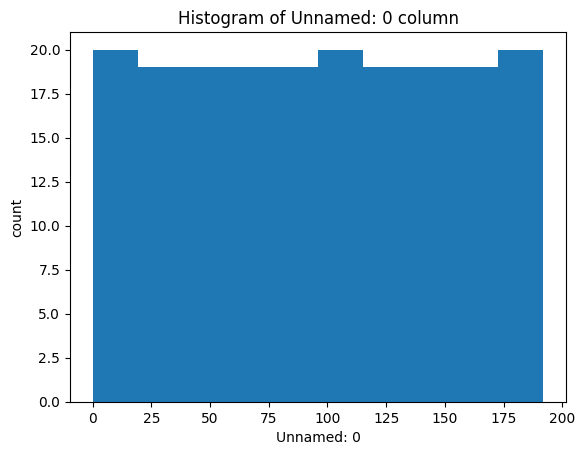

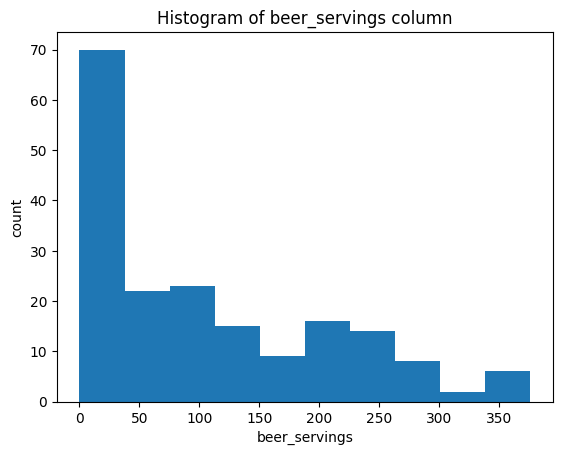

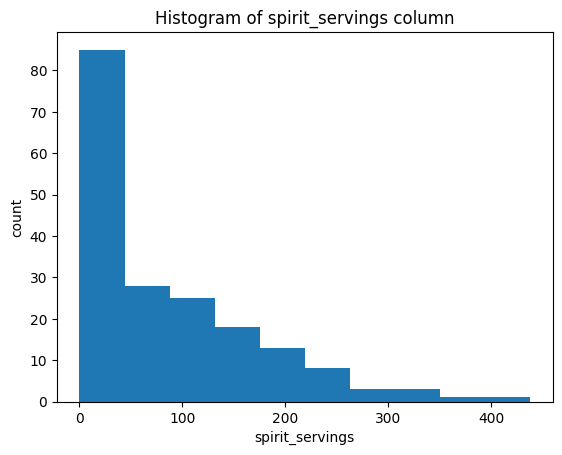

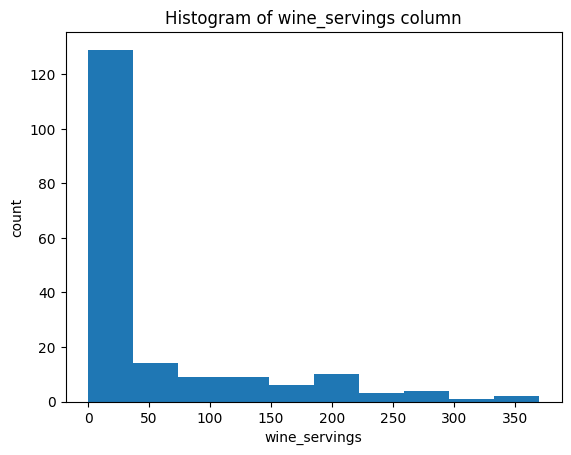

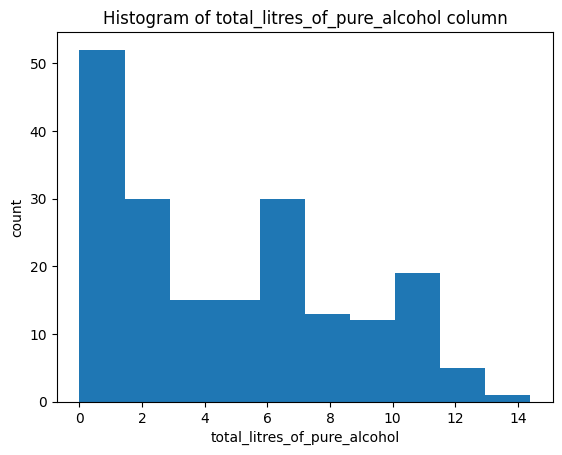

In [ ]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

Filling missing values for numerical columns

In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# sanity check to see if missng values are filled
num_df.isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

**Filling missing values for categorical columns**

In [ ]:
for col in cat_cols:
    print(cat_df[col].mode())

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object
0    Africa
Name: continent, dtype: object


In [ ]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

sanity check to see if missing values are filled

In [ ]:
cat_df.isna().sum()

,0
country,0
continent,0


**Recombine both numerical and categorical column**

In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
data.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
country,0
continent,0


In [ ]:
dup_cols = data.columns.duplicated()
#remove duplicate columns if any
data = data.loc[:, ~dup_cols]

**Checking Duplicate columns Visually**

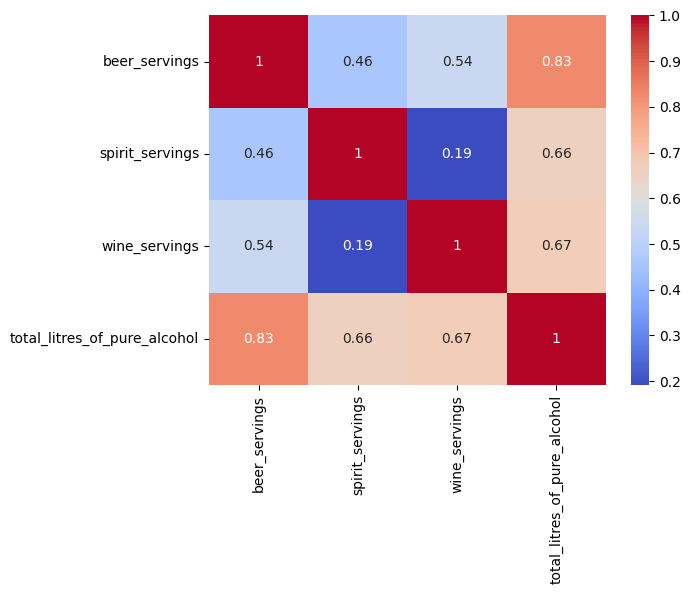

In [ ]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Outlier Handling**

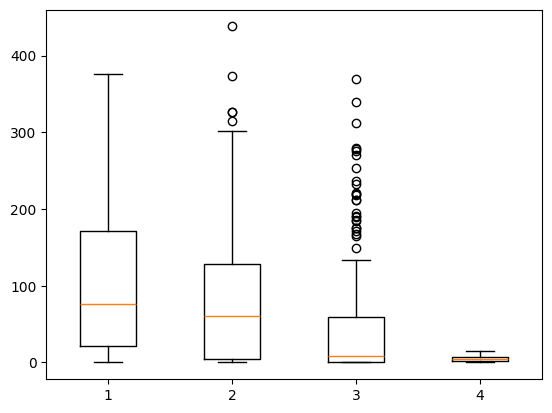

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def remove_outliers(df,column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[column_name] = df[column_name].clip(upper=upper_bound)
        df[column_name] = df[column_name].clip(lower=lower_bound)
        return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

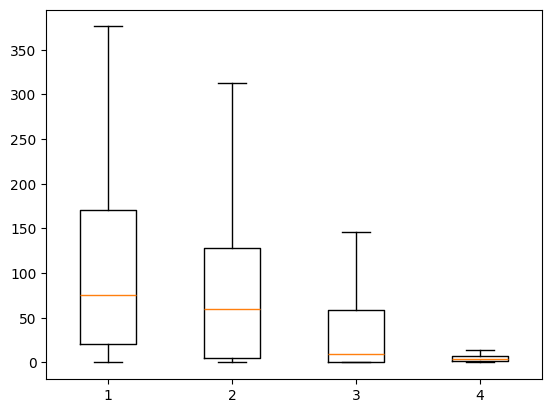

In [ ]:
plt.boxplot(num_df)
plt.show()

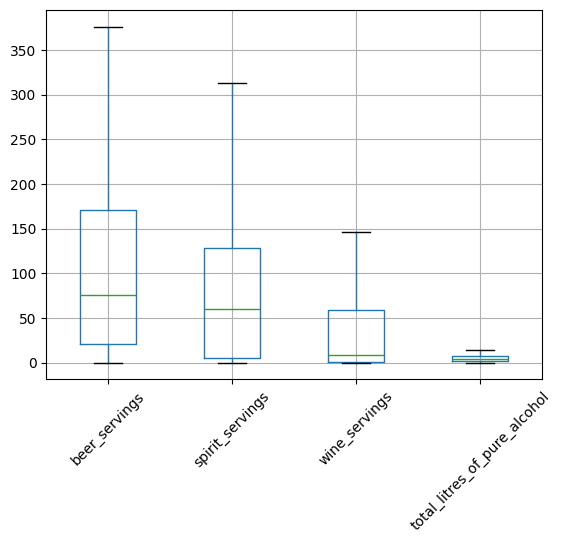

In [ ]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

**Checking Data imbalance**

In [ ]:
data['continent'].value_counts()

,count
continent,
Africa,53
Europe,45
Asia,44
North America,23
Oceania,16
South America,12


**Plot Class imbalance**

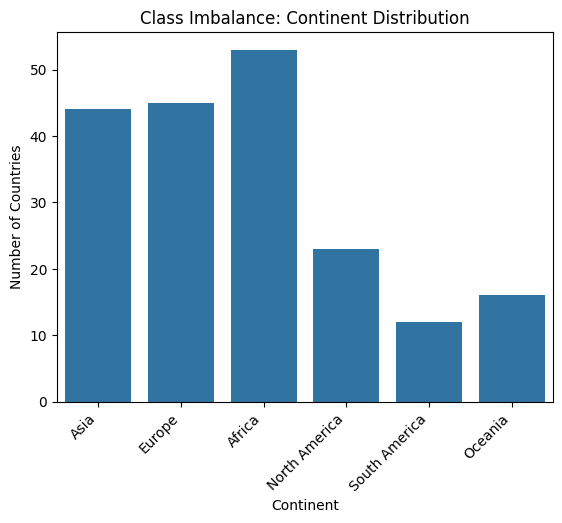

In [ ]:
sns.countplot(x='continent', data=data)
plt.title('Class Imbalance: Continent Distribution')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
x = data.drop('continent', axis = 1)
y = data['continent']
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# OR Undersampling
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = Undersampler.fit_resample(x,y)

continent
Asia             53
Europe           53
Africa           53
North America    53
South America    53
Oceania          53
Name: count, dtype: int64


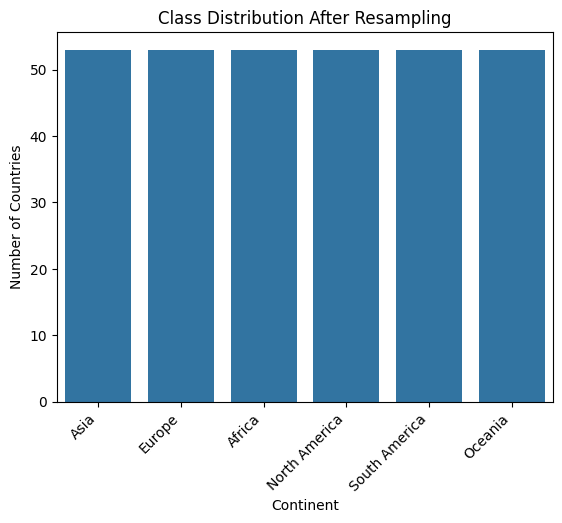

In [ ]:
# Create a new balanced DataFrame
balanced_data = pd.DataFrame(x_resampled, columns=x.columns)
balanced_data['continent'] = y_resampled

# check the class distribution after resampling
print(balanced_data['continent'].value_counts())

sns.countplot(x='continent', data=balanced_data)
plt.title('Class Distribution After Resampling')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha = 'right')
plt.show()

**Seperate Features and Labels**

In [ ]:
y = data["wine_servings"]
x = data.drop("wine_servings", axis = 1)

**Train-Test Split**

In [ ]:
# X_train, X_test, y_train, y-test = train_test_split(X, y, test_sized=0.2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,country,continent
82,63.0,69.0,2.5,Israel,Asia
109,238.0,68.0,5.5,Mexico,North America
163,128.0,178.0,5.6,Suriname,South America
35,130.0,124.0,7.6,Chile,South America
136,194.0,60.0,11.0,Portugal,Europe
...,...,...,...,...,...
106,0.0,0.0,0.0,Marshall Islands,Oceania
14,143.0,173.0,6.3,Barbados,North America
92,62.0,0.0,6.2,Laos,Asia
179,45.0,60.0,8.3,Uganda,Africa


# Data Normalization (for numerical columns)
 - Min Max scaling
    x_scaled = x-min(x)/(max(x)-min(x))
 - Standard Scaling
    x_scaled = x-mean(x)/stdev(x)

# Encoding (for categorical columns)
 - one hot Encoding
 - Label Encoding

**Scaling without Library**

In [ ]:
# min-max scaling
for col in num_cols[:-1]:
  num_df[col] = (num_df[col] - num_df[col].min()) / (num_df[col].max() - num_df[col].min())

In [ ]:
# Standard scaling
for col in num_cols[:-1]:
  num_df[col] = (num_df[col] - num_df[col].mean()) / num_df[col].std()

**Scaling with Library**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(num_df)
num_df = scaler.transform(num_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_df = min_max_scaler.fit_transform(num_df)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_df = std_scaler.fit_transform(num_df)

In [ ]:
import pickle
with open('min_max_scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)

In [ ]:
with open('min_max_scaler.pkl', 'rb') as f:
    min_max_scaler = pickle.load(f)

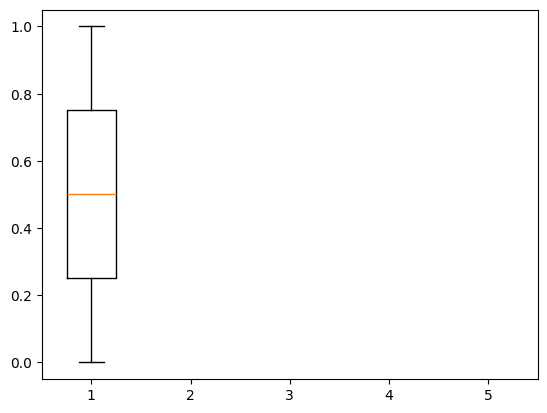

In [ ]:
plt.boxplot(num_df)
plt.show()

**One-hot Encoding** **bold text**

In [ ]:
data = {'color':['yellow', 'green', 'blue', 'yellow', 'green']}
df = pd.DataFrame(data)
df

,color
0,yellow
1,green
2,blue
3,yellow
4,green


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
final_df = pd.concat([df, encoded_df], axis=1)
final_df


,color,color_blue,color_green,color_yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['color_encoded'] = encoder.fit_transform(df['color'])
df

,color,color_encoded
0,yellow,2
1,green,1
2,blue,0
3,yellow,2
4,green,1


In [ ]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
with open('label_encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

Data Preprocessing Pipeline
 - Dropping duplicate rows
 - Finding and handling duplicate columns
 - Inspecting column data type
 - Splitting numerical and categorical variables
 - checking and filling missing values
  - Filling numerical
    - Inspecting with EDA
  - Filling categorical
 - Handling class imbalance
 - Outlier detecton and removal
 - scaling numerical columns
 - Encoding categorcal columns
 - pickle scalers and encoders
 - seperating features and labels
 - Train-test split